In [2]:
import numpy as np
from sklearn import datasets
# 使用手写数据作为样本数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 将多分类问题转换为二分类问题，同时让样本数据产生极度偏斜，
# 也就是我们关注的数据占总数据的1/9
y[digits.target == 9] = 1
y[digits.target != 9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [3]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.86746987951807231

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [5]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.94736842105263153

In [7]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.80000000000000004

In [14]:
decision_score = log_reg.decision_function(X_test)

In [15]:
decision_score.shape

(450,)

In [10]:
y_predict.shape

(450,)

In [16]:
decision_score[:10]

array([-22.05699101, -33.02943731, -16.21337319, -80.37919033,
       -48.25123648, -24.54007976, -44.39165363, -25.04299034,
        -0.97827283, -19.71746824])

In [13]:
y_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
y_predict2 = np.array(decision_score >= 5, dtype='int')

In [18]:
precision_score(y_test, y_predict2)

0.95999999999999996

In [19]:
recall_score(y_test, y_predict2)

0.53333333333333333

In [20]:
y_predict3 = np.array(decision_score >= -5, dtype='int')

In [21]:
precision_score(y_test, y_predict3)

0.72727272727272729

In [22]:
recall_score(y_test, y_predict3)

0.88888888888888884

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_score)

In [26]:
import matplotlib.pyplot as plt

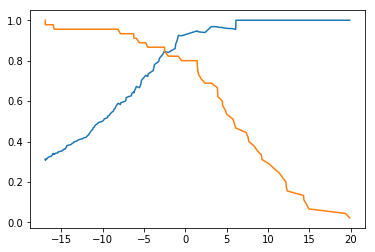

In [29]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

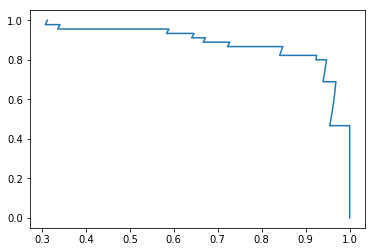

In [30]:
plt.plot(precisions, recalls)
plt.show()

## ROC曲线

In [31]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_score)

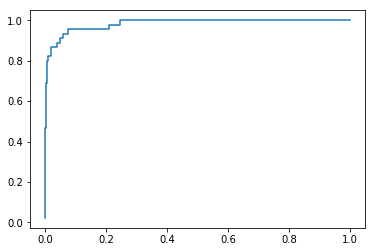

In [32]:
plt.plot(fprs, tprs)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_score)

0.98304526748971188